
## 作業

目標: 建立一深度學習模型預測客戶是否流失

- 問題一: 請將資料區分為訓練與測試資料集
- 問題二: 請將資料標準化
- 問題三: 使用Keras 建立深度學習模型預測客戶是否流失
- 問題四: 評估模型準確度
- 問題五: 請繪製ROC Curve, 並求出 AUC
- 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

### 讀取資料

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', header = 0 )
df.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

In [2]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 資料預處理

In [7]:
df = df.iloc[:,3:]

In [8]:
df.head()

CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619    France  Female  ...               1        101348.88       1
1          608     Spain  Female  ...               1        112542.58       0
2          502    France  Female  ...               0        113931.57       1
3          699    France  Female  ...               0         93826.63       0
4          850     Spain  Female  ...               1         79084.10       0

[5 rows x 11 columns]

In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
import pandas
geography = pandas.get_dummies(df['Geography'])
del geography['France']

In [12]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
import pandas
gender = pandas.get_dummies(df['Gender'])
del gender['Male']

In [16]:
#geography

In [18]:
df = pandas.concat([geography, gender, df], axis = 1)

In [19]:
df.head()

Germany  Spain  Female  ...  IsActiveMember EstimatedSalary Exited
0        0      0       1  ...               1       101348.88      1
1        0      1       1  ...               1       112542.58      0
2        0      0       1  ...               0       113931.57      1
3        0      0       1  ...               0        93826.63      0
4        0      1       1  ...               1        79084.10      0

[5 rows x 14 columns]

In [20]:
del df['Gender']
del df['Geography']

In [21]:
df.head()

Germany  Spain  Female  ...  IsActiveMember  EstimatedSalary  Exited
0        0      0       1  ...               1        101348.88       1
1        0      1       1  ...               1        112542.58       0
2        0      0       1  ...               0        113931.57       1
3        0      0       1  ...               0         93826.63       0
4        0      1       1  ...               1         79084.10       0

[5 rows x 12 columns]

### 將資料區分為訓練與測試資料集

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [24]:
train_x.shape

(7000, 11)

In [25]:
test_x.shape

(3000, 11)

### 將資料標準化

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)

In [28]:
train_x

array([[-0.57559072,  1.73073215,  1.09823226, ...,  0.64598061,
         0.97071435,  1.24821373],
       [ 1.73734559, -0.57779016,  1.09823226, ..., -1.54803408,
         0.97071435,  1.52122527],
       [-0.57559072, -0.57779016, -0.91055421, ..., -1.54803408,
        -1.03016917,  1.2636148 ],
       ...,
       [-0.57559072, -0.57779016,  1.09823226, ..., -1.54803408,
        -1.03016917, -0.14925893],
       [-0.57559072, -0.57779016, -0.91055421, ...,  0.64598061,
        -1.03016917, -0.05754351],
       [ 1.73734559, -0.57779016, -0.91055421, ...,  0.64598061,
         0.97071435, -0.81942612]])

In [29]:
test_x = sc.transform(test_x)

### 使用keras 建立模型

In [30]:
% tensorflow_version 2.x

In [31]:
import tensorflow as tf

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(5, activation='relu', input_shape = (11,)))
#model.add(Dropout(rate= 0.1))
model.add(Dense(5, activation='relu'))
#model.add(Dropout(rate= 0.1))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 60        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='adam', 
       loss = 'binary_crossentropy', 
       metrics = ['accuracy'])

In [ ]:
history = model.fit(
    x = train_x, 
    y = train_y,
    epochs = 100,
    verbose = 1,
    validation_data = (test_x, test_y))

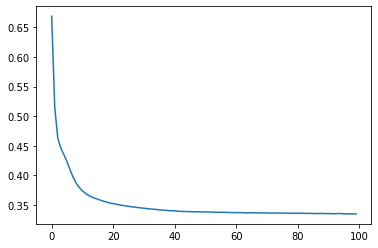

In [49]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

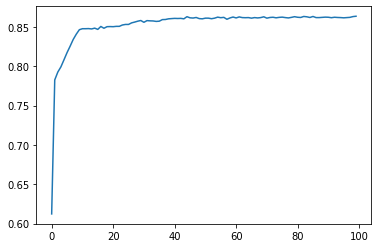

In [50]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

### 模型準確度

In [57]:
predicted_y = (model(test_x).numpy() > 0.5).flatten().astype(int)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predicted_y)

0.8696666666666667

### 請繪製ROC Curve, 並求出 AUC

In [59]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(test_y, model(test_x).numpy())

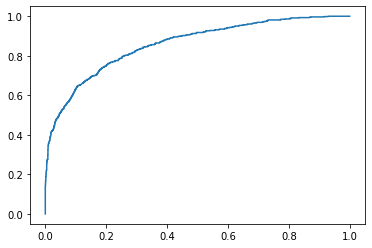

In [60]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)

In [62]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8579624705161935

### 比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_x, train_y)

clf2 = SVC(probability = True)
clf2.fit(train_x, train_y)

clf3 = LogisticRegression()
clf3.fit(train_x, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_x, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_x, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

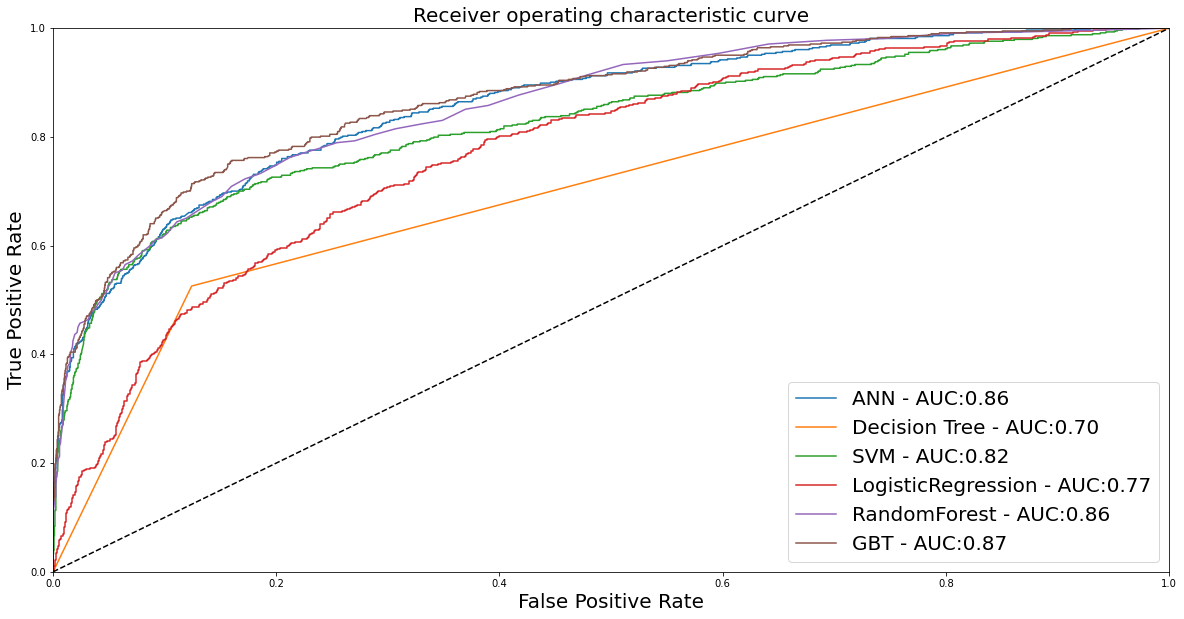

In [64]:
plt.figure(figsize= [20,10])

for clf, title in zip([model,clf1,clf2,clf3,clf4,clf5], 
             ['ANN','Decision Tree','SVM','LogisticRegression','RandomForest','GBT']):
  if title != 'ANN':
    probas_ = clf.predict_proba(test_x)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
  else:
    y_pred = clf(test_x).numpy()
    fpr, tpr, thresholds = roc_curve(test_y, y_pred)
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic curve', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

In [66]:
?model.compile

In [70]:
dir(tf.keras.optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'get',
 'schedules',
 'serialize']

## 使用CNN 建立MNIST 識別網路

In [2]:
! nvidia-smi

Sat Aug  1 03:25:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

In [4]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

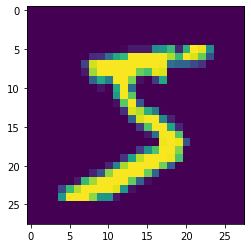

In [7]:
from matplotlib import pyplot as plt 
plt.imshow(train_images[0])

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [10]:
train_images.shape

(60000, 28, 28, 1)

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = Sequential()
# 1. Convolution
model.add(Conv2D(filters=16, 
        kernel_size=(3, 3), 
        padding = 'same', 
        input_shape = (28, 28, 1), 
        activation = 'relu'))

# 2. Max Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# 3. Flattening
model.add(Flatten())


# 4. Fully Connected Network (FCN)
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 402,986
Trainable params: 402,986
Non-trainable params: 0
_________________________________________________________________


## Loss
SparseCategoricalCrossentropy: y =0,1,2,3,4...9

categorical_crossentropy: y = [[1,0,0,0,0..0],[0,1,...0],[0,0,1,...0]]

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer = 'adam', 
         loss = loss_fn, 
         metrics = ['accuracy'])

In [18]:
#print(dir(tf.keras.optimizers))
#print(dir(tf.keras.losses))

In [19]:
history = model.fit(train_images, train_labels,
            batch_size=100,
            epochs=15,
            verbose=1,
          validation_data=(test_images, test_labels))

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4784 - accuracy: 0.9848 - val_loss: 1.4797 - val_accuracy: 0.9833
Epoch 2/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4751 - accuracy: 0.9877 - val_loss: 1.4796 - val_accuracy: 0.9824
Epoch 3/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4733 - accuracy: 0.9893 - val_loss: 1.4800 - val_accuracy: 0.9819
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4715 - accuracy: 0.9907 - val_loss: 1.4790 - val_accuracy: 0.9834
Epoch 5/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4698 - accuracy: 0.9923 - val_loss: 1.4775 - val_accuracy: 0.9840
Epoch 6/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9931 - val_loss: 1.4777 - val_accuracy: 0.9841
Epoch 7/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9934 - val_loss: 1.4763 - val_accuracy: 0.9859
Epoch 

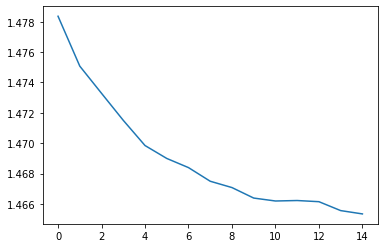

In [20]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

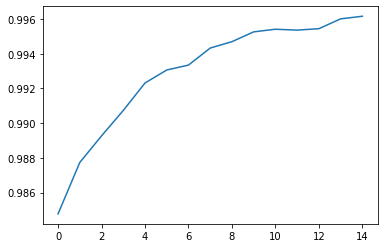

In [21]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

In [22]:
! wget https://raw.githubusercontent.com/ywchiu/tibamedl/master/data/7.png

--2020-08-01 03:32:50--  https://raw.githubusercontent.com/ywchiu/tibamedl/master/data/7.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 393 [image/png]
Saving to: ‘7.png’

7.png               100%[===================>]     393  --.-KB/s    in 0s      

2020-08-01 03:32:50 (26.6 MB/s) - ‘7.png’ saved [393/393]



In [28]:
from PIL import Image
img = Image.open('7.png').convert('L')

In [29]:
import numpy as np
im = np.array(img)
im.shape

(28, 28)

In [31]:
im = 255 - im

In [33]:
im = im / 255.0

In [35]:
im.shape

(28, 28)

In [37]:
im = im.reshape((28,28,1))

In [38]:
im.shape

(28, 28, 1)

In [41]:
im = np.expand_dims(im, 0)

In [42]:
im.shape

(1, 28, 28, 1)

In [43]:
#(picnum, w, h, channel)
#(1, 28, 28, 1)

In [44]:
model.predict(im)

array([[1.6320417e-19, 1.4631481e-19, 4.0763138e-23, 2.0352089e-14,
        2.4928876e-13, 5.0275960e-20, 2.1309094e-17, 1.0000000e+00,
        3.8459006e-15, 7.2217716e-15]], dtype=float32)

In [45]:
np.argmax(model.predict(im))

7

## [實例] 利用卷積神經網路辨識圖片

### 寫爬蟲抓取明星圖片

In [46]:
import requests
res = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png/220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png')

In [47]:
with open('zhiyu_test.png' ,'wb') as f:
  f.write(res.content)

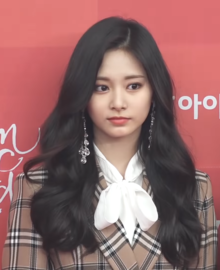

In [48]:
from PIL import Image
Image.open('zhiyu_test.png')

In [53]:
! pip install google_images_download

     |████████████████████████████████| 911kB 6.5MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=85a79820403af62f3f6e46917f97cc854b7ecdec81da1e0d57dafd9da7dcfa22
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [57]:
import requests
res = requests.get('https://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord=%E5%91%A8%E5%AD%90%E7%91%9C&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=-1&z=&ic=0&hd=&latest=&copyright=&word=%E5%91%A8%E5%AD%90%E7%91%9C&s=&se=&tab=&width=&height=&face=0&istype=2&qc=&nc=1&fr=&expermode=&force=&pn=120&rn=30&gsm=78&1596254720074=')
jd = res.json()

In [59]:
for img in jd['data']:
  print(img.get('middleURL'))

https://ss1.bdstatic.com/70cFvXSh_Q1YnxGkpoWK1HF6hhy/it/u=1567820363,3385104630&fm=26&gp=0.jpg
https://ss0.bdstatic.com/70cFuHSh_Q1YnxGkpoWK1HF6hhy/it/u=3411140151,4185830543&fm=26&gp=0.jpg
https://ss2.bdstatic.com/70cFvnSh_Q1YnxGkpoWK1HF6hhy/it/u=3787406153,806792539&fm=26&gp=0.jpg
https://ss3.bdstatic.com/70cFv8Sh_Q1YnxGkpoWK1HF6hhy/it/u=2613854485,1060304972&fm=26&gp=0.jpg
https://ss1.bdstatic.com/70cFvXSh_Q1YnxGkpoWK1HF6hhy/it/u=3099081977,3023464014&fm=26&gp=0.jpg
https://ss1.bdstatic.com/70cFvXSh_Q1YnxGkpoWK1HF6hhy/it/u=1172841971,508307288&fm=26&gp=0.jpg
https://ss1.bdstatic.com/70cFuXSh_Q1YnxGkpoWK1HF6hhy/it/u=1301190389,1676481024&fm=26&gp=0.jpg
https://ss0.bdstatic.com/70cFuHSh_Q1YnxGkpoWK1HF6hhy/it/u=3179388575,3459569493&fm=26&gp=0.jpg
https://ss3.bdstatic.com/70cFv8Sh_Q1YnxGkpoWK1HF6hhy/it/u=1168466272,523798649&fm=26&gp=0.jpg
https://ss2.bdstatic.com/70cFvnSh_Q1YnxGkpoWK1HF6hhy/it/u=233302922,623571486&fm=26&gp=0.jpg
https://ss2.bdstatic.com/70cFvnSh_Q1YnxGkpoWK1HF6hhy/it

In [75]:
def getPicture(path, url):
  res = requests.get(url)
  with open('{}/{}.jpg'.format(path, url.split('u=')[1].split('&')[0]) , 'wb') as f:
    f.write(res.content)

In [85]:
baidu_url = 'https://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord={}&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=-1&z=&ic=0&hd=&latest=&copyright=&word={}&s=&se=&tab=&width=&height=&face=0&istype=2&qc=&nc=1&fr=&expermode=&force=&pn={}&rn=30&gsm=78&1596254720074='
def getIdolImage(path, term, pagenum):
  if not os.path.exists(path):
    os.mkdir(path)
  for p in range(pagenum):
    res = requests.get(baidu_url.format(term, term, pagenum * 30))
    jd = res.json()
    for img in jd['data']:
      if img.get('middleURL'):
        getPicture(path, img.get('middleURL'))

In [80]:
getIdolImage('zhiyu/', '周子瑜' , 5)

In [81]:
! ls zhiyu | wc -l 

60


In [83]:
#! zip -r zhiyu zhiyu/*

In [86]:
getIdolImage('ning/', '张钧甯' , 3)

In [87]:
! ls ning | wc -l 

42


In [90]:
! zip -r ning ning/*

  adding: ning/1065940236,2351591012.jpg (deflated 0%)
  adding: ning/117487481,2001023976.jpg (deflated 0%)
  adding: ning/1239906645,868325344.jpg (deflated 1%)
  adding: ning/1493146964,2499526578.jpg (deflated 0%)
  adding: ning/152228759,3566698306.jpg (deflated 1%)
  adding: ning/1573792175,2613165350.jpg (deflated 0%)
  adding: ning/1646717786,1639568989.jpg (deflated 0%)
  adding: ning/172371035,3960180157.jpg (deflated 0%)
  adding: ning/1734073644,3223955364.jpg (deflated 0%)
  adding: ning/1842543233,2727112240.jpg (deflated 0%)
  adding: ning/1937391276,937684927.jpg (deflated 1%)
  adding: ning/197619559,1490231874.jpg (deflated 0%)
  adding: ning/1999564752,1903942571.jpg (deflated 0%)
  adding: ning/2041533341,2193964909.jpg (deflated 1%)
  adding: ning/2046783697,3406947282.jpg (deflated 0%)
  adding: ning/2061875557,3123840972.jpg (deflated 0%)
  adding: ning/2120474464,4004767592.jpg (deflated 1%)
  adding: ning/2168206564,2859682620.jpg (deflated 0%)
  adding: ning/2

In [92]:
getIdolImage('gem/', '邓紫棋' , 5)

In [89]:
! ls gem | wc -l 

30


In [91]:
! zip -r gem gem/*

  adding: gem/1074790825,3831576924.jpg (deflated 1%)
  adding: gem/1132653501,460162930.jpg (deflated 10%)
  adding: gem/1449541942,4162565655.jpg (deflated 1%)
  adding: gem/1452570317,2896188268.jpg (deflated 1%)
  adding: gem/1553225710,839417953.jpg (deflated 1%)
  adding: gem/16594607,2187333941.jpg (deflated 2%)
  adding: gem/1664999240,2187919217.jpg (deflated 2%)
  adding: gem/1741176069,1051871524.jpg (deflated 1%)
  adding: gem/17458926,2876790909.jpg (deflated 1%)
  adding: gem/1892754062,3320541358.jpg (deflated 1%)
  adding: gem/2026922150,4291128020.jpg (deflated 1%)
  adding: gem/2224578055,3035195458.jpg (deflated 0%)
  adding: gem/2335261809,330657283.jpg (deflated 1%)
  adding: gem/2347208693,2920585813.jpg (deflated 1%)
  adding: gem/2374124418,4276775839.jpg (deflated 1%)
  adding: gem/2474034278,3647391850.jpg (deflated 0%)
  adding: gem/2486844804,259761539.jpg (deflated 0%)
  adding: gem/2487592806,3345569403.jpg (deflated 1%)
  adding: gem/2646048027,3924449655

### 使用opencv擷取臉部資訊

In [1]:
import cv2 as cv

In [2]:
import requests
res = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png/220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png')

In [3]:
with open('zhiyu_test.png' ,'wb') as f:
  f.write(res.content)

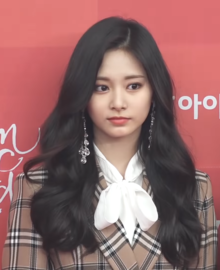

In [14]:
from PIL import Image
img = Image.open('zhiyu_test.png')
img

In [7]:
! wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2020-08-01 05:49:27--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.1s    

2020-08-01 05:49:27 (7.49 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [15]:
im = cv.imread('zhiyu_test.png')
im.shape

(270, 220, 3)

In [17]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(im, 1.3, 5)
faces

array([[82, 60, 76, 76]], dtype=int32)

In [18]:
x,y,w,h = faces[0]

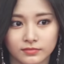

In [19]:
box     = (x, y, x+w, y+h)
crpim   = img.crop(box).resize((64,64))
crpim

In [20]:
! unzip ning.zip > ning.log

In [21]:
! unzip gem.zip > gem.log

In [22]:
! unzip zhiyu.zip > zhiyu.log

In [28]:
import os
def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
          try:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)
          except:
            pass

In [26]:
cropIdolFace('zhiyu/', 'zhiyu_face/')

In [29]:
cropIdolFace('ning/', 'ning_face/')

In [30]:
cropIdolFace('gem/', 'gem_face/')

In [ ]:
! zip -r zhiyu_face zhiyu_face/*
! zip -r ning_face ning_face/*
! zip -r gem_face gem_face/*

In [ ]:
! unzip faceset.zip

### 使用 CNN 建立人臉識別模型

In [33]:
% tensorflow_version 2.x

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(filters=32, 
           kernel_size=(3, 3),                                    padding = 'same',
           input_shape = (64, 64, 3),
           activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(filters=32, 
          kernel_size=(3, 3), 
          padding = 'same', 
          activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

In [66]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [67]:
classifier.compile(optimizer = 'adam', 
          loss ='categorical_crossentropy', 
          metrics = ['accuracy'])

### 圖像增廣技術

In [68]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
           rescale = 1./255,
           shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
           zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
           horizontal_flip = True #水平翻转操作
         )

In [69]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [47]:
import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [50]:
! rm -rf zhiyu_face ning_face gem_face

In [ ]:
! unzip faceset.zip

In [53]:
! mv faceset/gem_face ./
! mv faceset/ning_face ./
! mv faceset/zhiyu_face ./

In [70]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.33, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [55]:
splitDataset('zhiyu_face/')

In [56]:
splitDataset('ning_face/')

In [57]:
splitDataset('gem_face/')

In [71]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (64, 64),
     batch_size = 16,
     class_mode = 'categorical')

Found 55 images belonging to 3 classes.


In [72]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (64, 64),
    batch_size = 16, 
    class_mode = 'categorical')

Found 28 images belonging to 3 classes.


In [ ]:
history = classifier.fit_generator(training_set,
                  epochs=100,
                  verbose = 1,
                  validation_data = test_set)

### 驗證模型

In [75]:
import requests
res = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png/220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png')

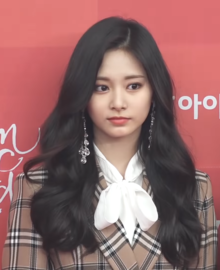

In [76]:
from PIL import Image
img = Image.open('zhiyu_test.png')
img

In [77]:
im = cv.imread('zhiyu_test.png')
im.shape

(270, 220, 3)

In [78]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(im, 1.3, 5)
faces

array([[82, 60, 76, 76]], dtype=int32)

In [79]:
x,y,w,h = faces[0]

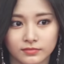

In [80]:
box     = (x, y, x+w, y+h)
crpim   = img.crop(box).resize((64,64))
crpim

In [83]:
crpim.save('predict_face.png')

In [84]:

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('predict_face.png', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [85]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 64, 64, 3)

In [87]:
classifier.predict_classes(test_image)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2])

In [88]:
training_set.class_indices

{'gem_face': 0, 'ning_face': 1, 'zhiyu_face': 2}

## 破解高鐵驗證碼

In [89]:
import requests
from bs4 import BeautifulSoup
headers2 = {
  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'  
}

def getCaptcha():
  rs = requests.session()
  res = rs.get('https://irs.thsrc.com.tw/IMINT/', headers = headers2)
  soup = BeautifulSoup(res.text, 'lxml')
  print(res.text)
  domain = 'https://irs.thsrc.com.tw'
  imgsrc = soup.select_one('img#BookingS1Form_homeCaptcha_passCode').get('src')
  imgurl = domain + imgsrc
  res2 = rs.get(imgurl, headers = headers2)
  with open('prediction.jpg', 'wb') as f:
    f.write(res2.content)

In [91]:
! wget https://raw.githubusercontent.com/ywchiu/tibamedl/master/data/captcha_jpg.zip

--2020-08-01 07:04:41--  https://raw.githubusercontent.com/ywchiu/tibamedl/master/data/captcha_jpg.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3818150 (3.6M) [application/zip]
Saving to: ‘captcha_jpg.zip’

captcha_jpg.zip     100%[===================>]   3.64M  17.4MB/s    in 0.2s    

2020-08-01 07:04:41 (17.4 MB/s) - ‘captcha_jpg.zip’ saved [3818150/3818150]



In [92]:
! unzip captcha_jpg.zip > 1.log

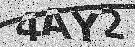

In [93]:
from PIL import Image
Image.open('data/1.jpg')

In [94]:
import pandas
captcha =  pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/output_captua.csv', usecols=['captcua', 'file'])
captcha.columns = ['captcha', 'file']

In [96]:
captcha.head(3)

captcha  file
0    4ay2   1.0
1    qmqh   2.0
2    kc3c   3.0

In [97]:
captcha = captcha[captcha['file'].notnull()]

In [98]:
len(captcha)

998

In [99]:
captcha['file'] = captcha['file'].map(lambda e: 'data/{}.jpg'.format(int(e)) )

In [100]:
captcha.head(3)

captcha        file
0    4ay2  data/1.jpg
1    qmqh  data/2.jpg
2    kc3c  data/3.jpg

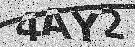

In [101]:
from PIL import Image

img = Image.open('data/1.jpg')
img = img.resize((135,47))
img

In [102]:
import numpy as np
im = np.array(img)
im.shape

(47, 135, 3)

### 建立 X 與 Y

In [103]:
characters = '0123456789abcdefghijklmnopqrstuvwxyz'
height, width = 47,135
n_len = 4
n_class = len(characters)
print(height, width, n_class,n_len)

47 135 36 4


In [104]:
X = np.zeros((len(captcha), height, width, 3), dtype=np.float32)

In [105]:
X.shape

(998, 47, 135, 3)

In [106]:
y = [np.zeros((len(captcha), n_class), dtype=np.uint8) for i in range(n_len)]

In [109]:
len(y)

4

In [108]:
y[0].shape

(998, 36)

In [110]:
X.shape, y[0].shape, len(y)

((998, 47, 135, 3), (998, 36), 4)

In [111]:
X[0].shape

(47, 135, 3)

In [114]:
for i in range(len(captcha)):
    random_str = captcha.iloc[i,0]
    fname = captcha.iloc[i,1]
    img = Image.open(fname)
    img = img.resize((width, height))
    im = np.array(img)
    X[i] = im * 1.0 / 255.0
    for j, ch in enumerate(random_str):
        y[j][i, :] = 0
        y[j][i, characters.find(ch)] = 1

In [115]:
y[0][0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [119]:
y[1][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [120]:
y[2][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [121]:
X[0]

array([[[0.9254902 , 0.9254902 , 0.9254902 ],
        [0.7372549 , 0.7372549 , 0.7372549 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        ...,
        [0.84705883, 0.84705883, 0.84705883],
        [0.8392157 , 0.8392157 , 0.8392157 ],
        [0.78431374, 0.78431374, 0.78431374]],

       [[0.827451  , 0.827451  , 0.827451  ],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        [0.81960785, 0.81960785, 0.81960785],
        ...,
        [0.6392157 , 0.6392157 , 0.6392157 ],
        [0.69411767, 0.69411767, 0.69411767],
        [0.8       , 0.8       , 0.8       ]],

       [[0.9764706 , 0.9764706 , 0.9764706 ],
        [0.627451  , 0.627451  , 0.627451  ],
        [0.8392157 , 0.8392157 , 0.8392157 ],
        ...,
        [0.65882355, 0.65882355, 0.65882355],
        [0.73333335, 0.73333335, 0.73333335],
        [0.6862745 , 0.6862745 , 0.6862745 ]],

       ...,

       [[0.8784314 , 0.8784314 , 0.8784314 ],
        [0.7294118 , 0.7294118 , 0.7294118 ],
        [0.81960785, 0

In [151]:
random.choice((range(len(captcha)))

SyntaxError: ignored

In [153]:
random.choice(range(len(captcha)))

595

In [226]:
import random
def gen(batch_size=32):
    X = np.zeros((batch_size, height, width, 3), dtype=np.float32)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    while True:
        for i in range(batch_size):
            rand_index = random.choice(range(len(captcha)))
            random_str = captcha.iloc[rand_index,0]
            fname = captcha.iloc[rand_index,1]
            img = Image.open(fname)
            img = img.resize((width, height))
            im = np.array(img)
            X[i] = im / 255.0

            for j, ch in enumerate(random_str):
                y[j][i, :] = 0
                y[j][i, characters.find(ch)] = 1
        yield X, y

### 建立 CNN 模型

In [227]:
%tensorflow_version 2.x
import tensorflow as tf

In [228]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout, Input

In [229]:
input_tensor = Input((height, width, 3))

x = input_tensor
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x) 

x = Conv2D(256, (3, 3), activation='relu')(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x) 

x = Flatten()(x)
x = Dropout(0.25)(x)

In [230]:
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]

model = Model(inputs=input_tensor, outputs=x)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 47, 135, 3)] 0                                            
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 45, 133, 64)  1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 43, 131, 64)  36928       conv2d_32[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_18 (MaxPooling2D) (None, 21, 65, 64)   0           conv2d_33[0][0]                  
____________________________________________________________________________________________

In [231]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [232]:
history = model.fit_generator(gen(batch_size=32),      # 每次生成器會產生32筆小批量的資料
                 epochs=5,                # 總共跑5個訓練循環
                 steps_per_epoch=100,
                 #callbacks=cbks,          # 保存最好的模型到檔案
                 validation_data=gen(batch_size=32),   # 驗證資料也是用生成器來產生
                 validation_steps=10      # 用40組資料來驗證
                   )

Epoch 1/5
 31/100 [========>.....................] - ETA: 2:50 - loss: 12.4923 - c1_loss: 3.1170 - c2_loss: 3.0992 - c3_loss: 3.1502 - c4_loss: 3.1260 - c1_accuracy: 0.0554 - c2_accuracy: 0.0665 - c3_accuracy: 0.0585 - c4_accuracy: 0.0726

KeyboardInterrupt: ignored

In [157]:
model.save('captcha.h5')

In [158]:
! wget https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/prediction.jpg

--2020-08-01 07:58:13--  https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/prediction.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3660 (3.6K) [image/jpeg]
Saving to: ‘prediction.jpg’

prediction.jpg      100%[===================>]   3.57K  --.-KB/s    in 0s      

2020-08-01 07:58:14 (44.0 MB/s) - ‘prediction.jpg’ saved [3660/3660]



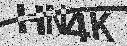

In [159]:
from PIL import Image
Image.open('prediction.jpg')

In [220]:
from PIL import Image
import numpy as np
img = Image.open('data/2.jpg')
img = img.resize((135,47))
#img
im = np.array(img)
im.shape
#im

(47, 135, 3)

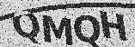

In [221]:
img

In [222]:
X = np.zeros((1, height, width, 3), dtype=np.float32)
X[0] = im * 1.0 / 255.0

In [223]:
X[0].shape

(47, 135, 3)

In [224]:
X.shape

(1, 47, 135, 3)

In [225]:
for p in model(X):
  print(characters[(np.argmax(p.numpy()))])

q
m
q
h


## AOI 檢測
- https://aidea-web.tw/topic/a49e3f76-69c9-4a4a-bcfc-c882840b3f27

In [233]:
! cp "/content/drive/My Drive/aidataset/aoi.zip" ./

In [234]:
! unzip aoi.zip > aoi.log

In [235]:
! unzip train_images.zip > train_images.log

### 檢視資料集

In [236]:
! head train.csv

ID,Label
train_00000.png,0
train_00001.png,1
train_00002.png,1
train_00003.png,5
train_00004.png,5
train_00005.png,5
train_00006.png,3
train_00007.png,0
train_00008.png,3


In [237]:
import pandas
train_df = pandas.read_csv('train.csv')
train_df.head()

ID  Label
0  train_00000.png      0
1  train_00001.png      1
2  train_00002.png      1
3  train_00003.png      5
4  train_00004.png      5

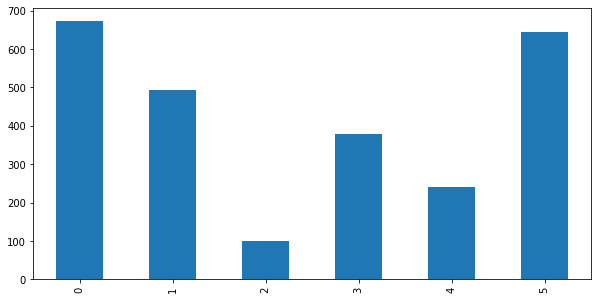

In [238]:
train_df['Label'].value_counts().sort_index().plot(kind = 'bar', figsize = [10,5])

### 檢視影像

In [239]:
import matplotlib.image as mpimg
img0 = mpimg.imread('train_images/train_00000.png')
img1 = mpimg.imread('train_images/train_00001.png')
img2 = mpimg.imread('train_images/train_00118.png')
img3 = mpimg.imread('train_images/train_00006.png')
img4 = mpimg.imread('train_images/train_00028.png')
img5 = mpimg.imread('train_images/train_00003.png')
images = [img0,img1,img2,img3,img4,img5]

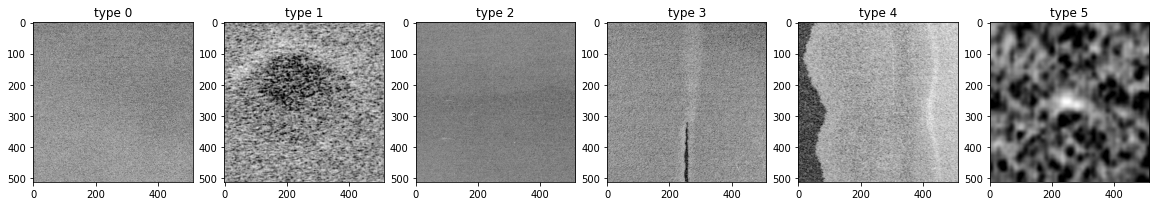

In [240]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
for idx, img in enumerate(images):
  plt.subplot(1,6,idx+1)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title('type {}'.format(idx))
plt.show()

### 建立訓練與測試資料集

In [255]:
import os
src_dir = '/content/train_images'
base_dir = '/content/images'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [256]:
# 建立資料目錄
if not os.path.exists(base_dir):
  os.mkdir(base_dir)

# 建立訓練資料集目錄
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
  
# 建立測試資料集目錄
if not os.path.exists(test_dir):
  os.mkdir(test_dir)

In [260]:
from sklearn.model_selection import train_test_split
from shutil import copyfile
def copy_training_iamges(label):

  data_ids = train_df[train_df['Label'] == label]['ID'].tolist()
  train_ids, test_ids = train_test_split(data_ids, test_size = 0.4, random_state = 42)
  if not os.path.exists('/content/images/train/{}/'.format(label)):
    os.mkdir('/content/images/train/{}/'.format(label))
  if not os.path.exists('/content/images/test/{}/'.format(label)):
    os.mkdir('/content/images/test/{}/'.format(label))
  for fname in train_ids:
    copyfile(os.path.join(src_dir, fname), os.path.join('/content/images/train/{}/'.format(label), fname))
  for fname in test_ids:
    copyfile(os.path.join(src_dir, fname), os.path.join('/content/images/test/{}/'.format(label), fname))

In [261]:
copy_training_iamges(0)

In [262]:
copy_training_iamges(1)

In [263]:
copy_training_iamges(5)

### 建立模型

In [245]:
% tensorflow_version 2.x

In [246]:
import tensorflow as tf

In [247]:
from tensorflow.keras.applications import VGG16
img_width, img_height = 512, 512
conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [248]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0     

In [249]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                   horizontal_flip = True #水平翻转操作
                  )
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

In [264]:
train_generator = train_datagen.flow_from_directory(train_dir,
                              target_size=(img_width,img_height),
                              batch_size = batch_size,
                              class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                              target_size=(img_width,img_height),
                              batch_size = batch_size,
                              class_mode='categorical')

Found 1085 images belonging to 3 classes.
Found 725 images belonging to 3 classes.


In [265]:
def gen_data(generator):
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        yield features_batch, labels_batch

In [273]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(16,16,512)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              134218752 
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)              

In [274]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit( gen_data(train_generator),
                    validation_data=gen_data(test_generator), 
                    validation_steps = 10,epochs=10, steps_per_epoch=100)

In [271]:
#conv_base.get_weights()

## YOLOv4

In [286]:
! rm -rf darknet

In [287]:
! git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 14086, done.
remote: Total 14086 (delta 0), reused 0 (delta 0), pack-reused 14086
Receiving objects: 100% (14086/14086), 12.72 MiB | 20.00 MiB/s, done.
Resolving deltas: 100% (9587/9587), done.


In [288]:
! head darknet/Makefile

GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [ ]:
! sed -i "s/GPU=0/GPU=1/g" /content/darknet/Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" /content/darknet/Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" /content/darknet/Makefile

In [289]:
! head darknet/Makefile

GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



### 編譯 YOLOv4

In [ ]:
! cd darknet; make

### 使用YOLOv4

In [291]:
! cd darknet ; ./darknet

### 下載權重
https://drive.google.com/open?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

In [292]:

! gdown https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

Downloading...
From: https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
To: /content/yolov4.weights
258MB [00:01, 175MB/s]


### 使用YOLOv4偵測與辨識物件

In [293]:
! ls darknet/data

9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


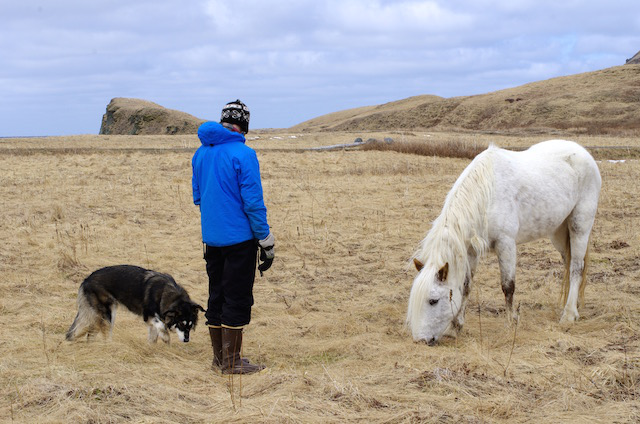

In [294]:
from PIL import Image
Image.open('darknet/data/person.jpg')

In [295]:
! cd darknet; ./darknet detect /content/darknet/cfg/yolov4.cfg  /content/yolov4.weights /content/darknet/data/person.jpg

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv     64       1 x 1/ 1    304 x 304

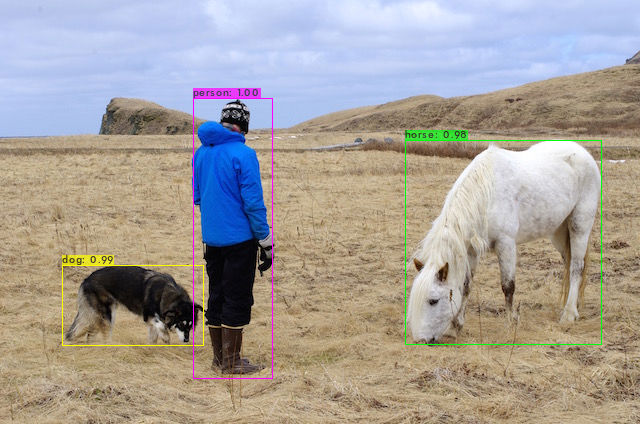

In [296]:
from PIL import Image
Image.open('/content/darknet/predictions.jpg')

In [297]:
! wget https://img.ltn.com.tw/Upload/news/600/2014/04/11/126.jpg

--2020-08-01 09:12:30--  https://img.ltn.com.tw/Upload/news/600/2014/04/11/126.jpg
Resolving img.ltn.com.tw (img.ltn.com.tw)... 13.226.50.7, 13.226.50.90, 13.226.50.28, ...
Connecting to img.ltn.com.tw (img.ltn.com.tw)|13.226.50.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85485 (83K) [image/jpeg]
Saving to: ‘126.jpg’

126.jpg             100%[===================>]  83.48K  76.0KB/s    in 1.1s    

2020-08-01 09:12:31 (76.0 KB/s) - ‘126.jpg’ saved [85485/85485]



In [298]:
! cd darknet; ./darknet detect /content/darknet/cfg/yolov4.cfg  /content/yolov4.weights /content/126.jpg

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv     64       1 x 1/ 1    304 x 304

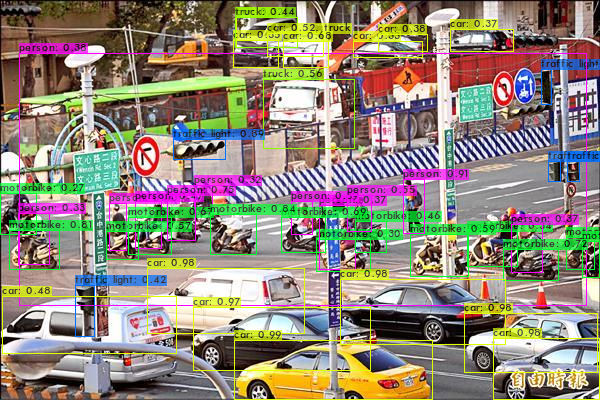

In [299]:
from PIL import Image
Image.open('/content/darknet/predictions.jpg')

### 口罩識別

In [302]:
! gdown https://drive.google.com/uc?id=1rf-ggLJ1igZaW7yMbApr2ys0enF0ucJ3

Downloading...
From: https://drive.google.com/uc?id=1rf-ggLJ1igZaW7yMbApr2ys0enF0ucJ3
To: /content/medical-masks-dataset.zip
151MB [00:01, 98.1MB/s]


In [303]:
! unzip /content/medical-masks-dataset.zip > data_unzip.log

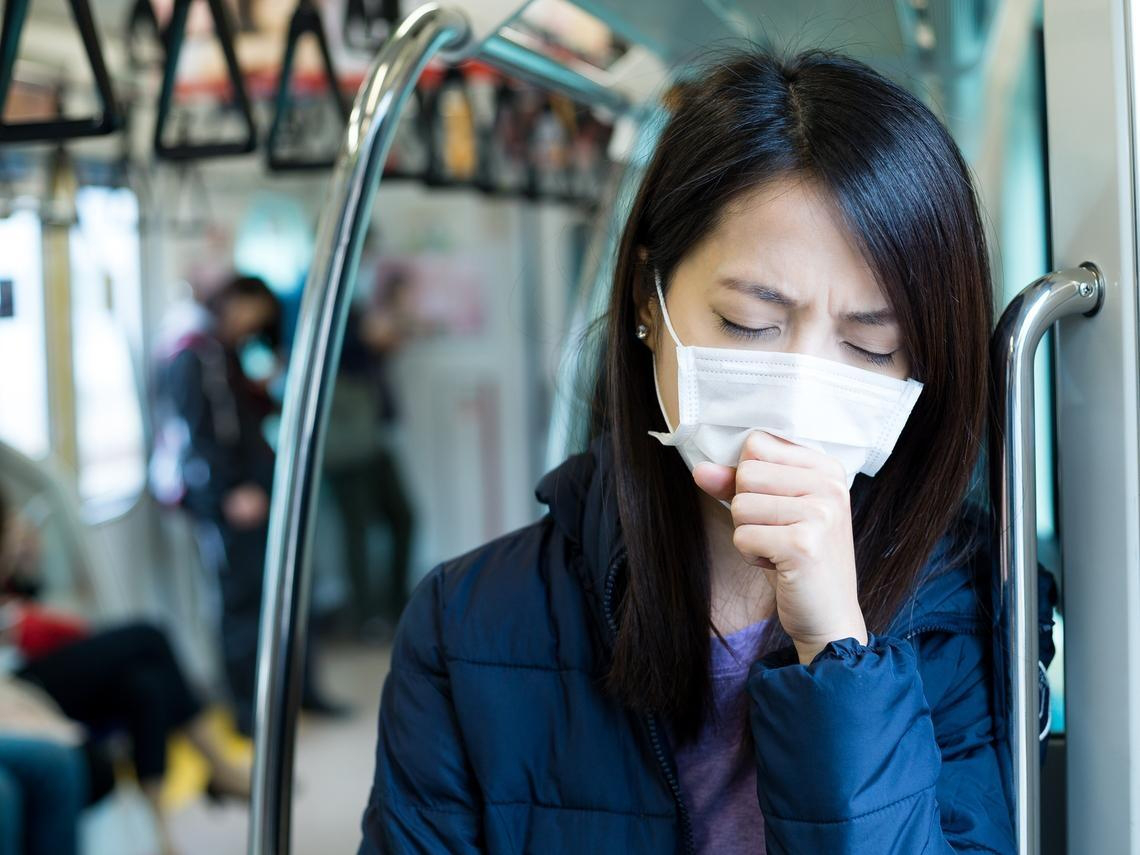

In [304]:
from PIL import Image
img = Image.open('/content/images/012106.jpg_1140x855.jpg')
img

In [305]:

! cat /content/labels/012106.jpg_1140x855.xml

<annotation>
	<folder>images</folder>
	<filename>012106.jpg_1140x855.jpg</filename>
	<path>P:\mask_mouth\images\012106.jpg_1140x855.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1140</width>
		<height>855</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>good</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>654</xmin>
			<ymin>275</ymin>
			<xmax>910</xmax>
			<ymax>517</ymax>
		</bndbox>
	</object>
</annotation>


## LabelImg
- https://github.com/tzutalin/labelImg

In [306]:
from bs4 import BeautifulSoup
import os
import shutil

status_dic = {'good': 2, 'bad': 1, 'none': 0}
def getYoloFormat(filename,label_path, img_path, yolo_path, newname):
    with open(label_path+ filename, 'r') as f:
        soup = BeautifulSoup(f.read(), 'xml')
        imgname = soup.select_one('filename').text
        image_w = int(soup.select_one('width').text)
        image_h = int(soup.select_one('height').text)
        ary = []
        for obj in soup.select('object'):
            xmin = int(obj.select_one('xmin').text)
            xmax = int(obj.select_one('xmax').text)
            ymin = int(obj.select_one('ymin').text)
            ymax = int(obj.select_one('ymax').text)
            objclass = status_dic.get(obj.select_one('name').text)

            x = (xmin + (xmax-xmin)/2) * 1.0 / image_w
            y = (ymin + (ymax-ymin)/2) * 1.0 / image_h
            w = (xmax-xmin) * 1.0 / image_w
            h = (ymax-ymin) * 1.0 / image_h
            ary.append(' '.join([str(objclass), str(x),str(y),str(w),str(h)]))
        if os.path.exists(img_path + imgname):
            shutil.copyfile(img_path + imgname, yolo_path + newname + '.jpg')
            with open(yolo_path + newname + '.txt', 'w') as f:
                f.write('\n'.join(ary))

In [308]:
! rm -rf /content/yolo
! mkdir /content/yolo

In [309]:
import os
labelpath = '/content/labels/'
imgpath   = '/content/images/'
yolopath  = '/content/yolo/'
ary = []
for idx, f in enumerate(os.listdir(labelpath)):
    try:
        getYoloFormat(f, labelpath,imgpath, yolopath, str(idx))
    except Exception as e:
        print(e)

float division by zero


In [312]:
! cat /content/yolo/1.txt

2 0.24375 0.16844919786096257 0.2175 0.24064171122994651
2 0.8225 0.24598930481283424 0.285 0.35294117647058826
2 0.31125 0.7740641711229946 0.1225 0.18983957219251338
2 0.74375 0.8088235294117647 0.2575 0.27540106951871657

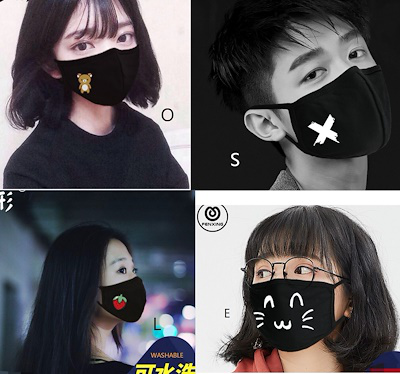

In [313]:

from PIL import Image
Image.open('/content/yolo/1.jpg')

## 準備訓練與測試資料集

In [314]:
! rm -rf /content/cfg_mask
! mkdir /content/cfg_mask

In [315]:

import os
datasets = ['/content/yolo/'+ f for f in os.listdir('/content/yolo/') if not f.endswith('.txt')]
len(datasets) * 0.8

541.6

In [316]:

with open('/content/cfg_mask/train.txt', 'w') as f:
    f.write('\n'.join(datasets[0:540]))

In [317]:

with open('/content/cfg_mask/test.txt', 'w') as f:
    f.write('\n'.join(datasets[540:]))

## 複製參數檔案

In [318]:

! cp "/content/drive/My Drive/aidataset/cfg_mask/obj.data" cfg_mask/
! cp "/content/drive/My Drive/aidataset/cfg_mask/obj.names" cfg_mask/

In [319]:
! head /content/cfg_mask/obj.data

classes= 3
train  = /content/cfg_mask/train.txt
valid  = /content/cfg_mask/test.txt
names  = /content/cfg_mask/obj.names
backup = /content/cfg_mask/weights/

In [320]:
! head /content/cfg_mask/obj.names

none
bad
good


##建立權重資料夾

/content/darknet/cfg/yolov4.cfg  
/content/yolov4.weights

In [321]:

! cp /content/darknet/cfg/yolov4.cfg /content/cfg_mask/

In [327]:
! sed -n -e 968p -e 1056p -e 1144p /content/cfg_mask/yolov4.cfg

classes=80
classes=80
classes=80


In [328]:
! sed -i '968s/80/3/' /content/cfg_mask/yolov4.cfg
! sed -i '1056s/80/3/' /content/cfg_mask/yolov4.cfg
! sed -i '1144s/80/3/' /content/cfg_mask/yolov4.cfg

In [329]:
! sed -n -e 968p -e 1056p -e 1144p /content/cfg_mask/yolov4.cfg

classes=3
classes=3
classes=3


In [330]:
! sed -n -e 961p -e 1049p -e 1137p /content/cfg_mask/yolov4.cfg

filters=255
filters=255
filters=255


In [331]:

! sed -i '961s/255/24/' /content/cfg_mask/yolov4.cfg
! sed -i '1049s/255/24/' /content/cfg_mask/yolov4.cfg
! sed -i '1137s/255/24/' /content/cfg_mask/yolov4.cfg

YOLOV3 偵測的濾鏡(filter) 大小為 (C+5)*B.
- B 是每個Feature Map 可以偵測的Bounding Box 數量
5 是Bounding Box 的x,y,w,h 以及 Confidence
- C 是類別數量

- filters=(classes + 5)*3 # 24
- classes=3

In [334]:
! sed -n -e 961p -e 1049p -e 1137p /content/cfg_mask/yolov4.cfg

filters=24
filters=24
filters=24


In [335]:
! darknet/darknet detector train /content/cfg_mask/obj.data /content/cfg_mask/yolov4.cfg /content/yolov4.weights

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
yolov4
mini_batch = 8, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv     64       1 x 1/ 1    3